# EDA - 1: Getting Start.

In [118]:
%load_ext autoreload
%autoreload 2

import os
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(os.path.abspath('..'))
# ---------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# ---------------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
id        600000 non-null int64
bin_0     582106 non-null float64
bin_1     581997 non-null float64
bin_2     582070 non-null float64
bin_3     581986 non-null object
bin_4     581953 non-null object
nom_0     581748 non-null object
nom_1     581844 non-null object
nom_2     581965 non-null object
nom_3     581879 non-null object
nom_4     581965 non-null object
nom_5     582222 non-null object
nom_6     581869 non-null object
nom_7     581997 non-null object
nom_8     582245 non-null object
nom_9     581927 non-null object
ord_0     581712 non-null float64
ord_1     581959 non-null object
ord_2     581925 non-null object
ord_3     582084 non-null object
ord_4     582070 non-null object
ord_5     582287 non-null object
day       582048 non-null float64
month     582012 non-null float64
target    600000 non-null int64
dtypes: float64(6), int64(2), object(17)
memory usage: 114.4

In [5]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


## Focus on NaN

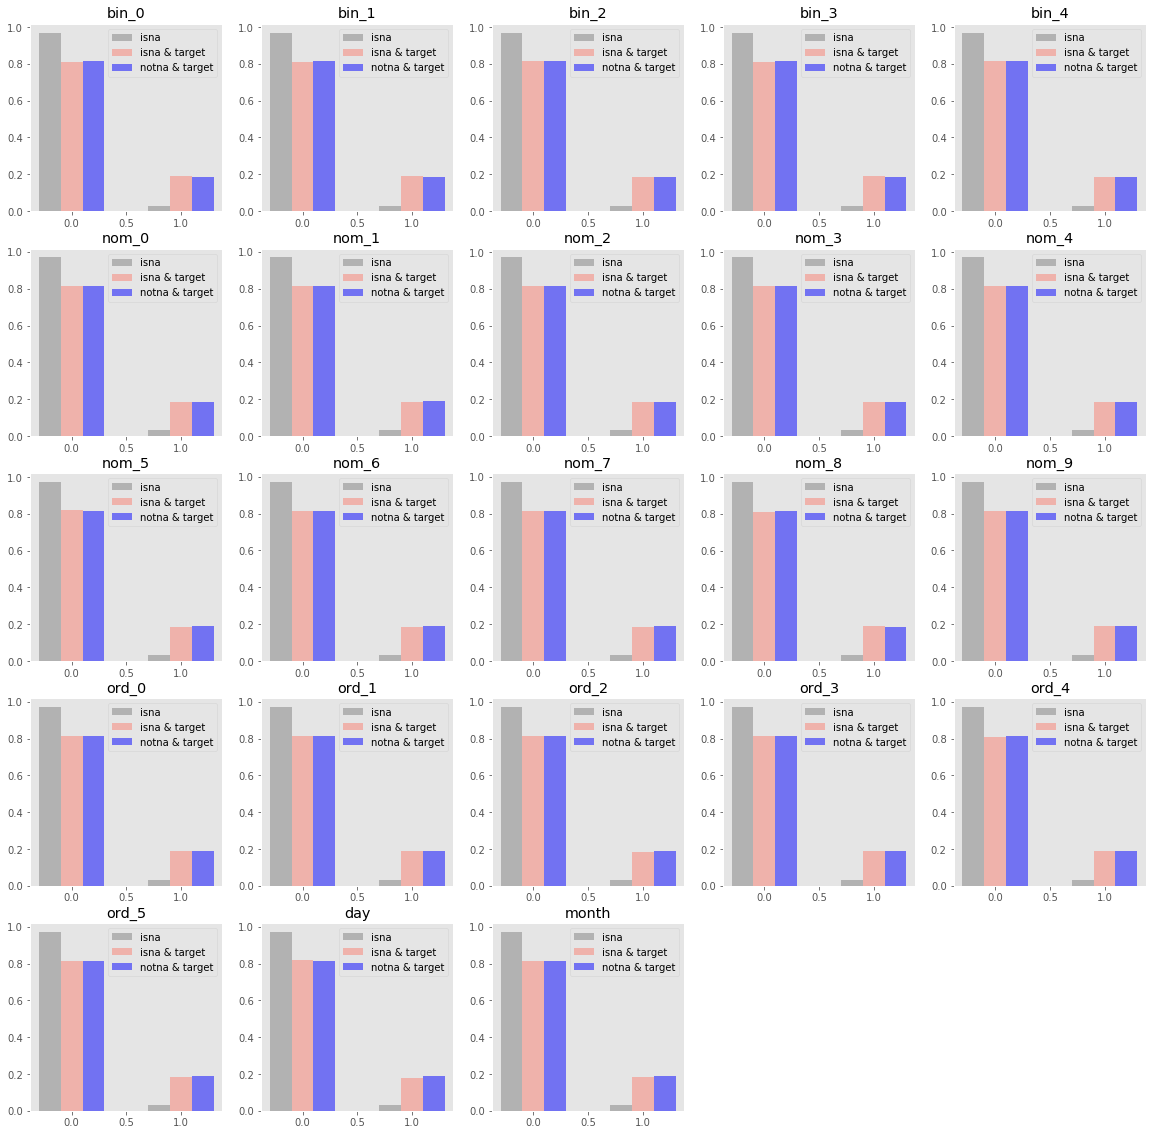

In [121]:
i = 0
plt.figure(figsize=(20, 20))
numcol = np.ceil(np.sqrt(len(train_df.columns) - 2))

color = ['gray', 'salmon', 'b']

for col in train_df.columns:
    if col not in ['id', 'target']:
        
        i += 1
        se_dic = {}
        isna = train_df[col].isna()
        se_dic['isna'] = isna.apply(lambda x: x).astype('float')
        se_dic['isna & target'] = train_df['target'][isna].astype('float')
        se_dic['notna & target'] = train_df['target'][isna.map(lambda x: not x)].astype('float')

        plt.subplot(numcol, numcol, i)
        plt.title(f'{col}')
        
        for idx, (key, values) in enumerate(se_dic.items()):
            vc = values.value_counts(normalize=True)
            plt.bar([v+(0.2*(idx-1)) for v in vc.index], vc.values, alpha=0.5, width=0.2, color=color[idx], label=key)
            plt.grid()
            plt.legend()

plt.show()

In [314]:
isnull_df = pd.concat((train_df.isnull().sum(axis=1), train_df.target), axis=1, keys=('numnull','target'))
gb = isnull_df.groupby('numnull').target
pd.concat((gb.mean(), gb.count()), axis=1, keys=('mean', 'numbers'))

,mean,numbers
numnull,,
0,0.187947,298042
1,0.186538,211383
2,0.186684,72111
3,0.186734,15664
4,0.178528,2487
5,0.139456,294
6,0.222222,18
7,0.000000,1


# Featuers

In [294]:
def plot_feature(colname, max_nunique=20, max_vcol=2):
    """
    colname: list or str.
    """
    colname = [colname] if type(colname)=='str' else colname
    numcol = int(np.ceil(len(colname) / max_vcol))
    plt.figure(figsize=[max_vcol * 7, numcol * 7])
    
    for i, col in enumerate(colname):
        vc = train_df[col].value_counts(normalize=True)[:max_nunique]
        target_is_1_perc = train_df.groupby(col).target.value_counts(normalize=True)[:, 1][vc.index]
        # plt
        plt.subplot(numcol, max_vcol, i+1)
        plt.title(f'{col}')
        plt.bar(vc.index, vc.values, color='b', width=0.5, alpha=0.5)
        plt.plot(target_is_1_perc.index, target_is_1_perc.values, '.-')
    
    plt.show()    

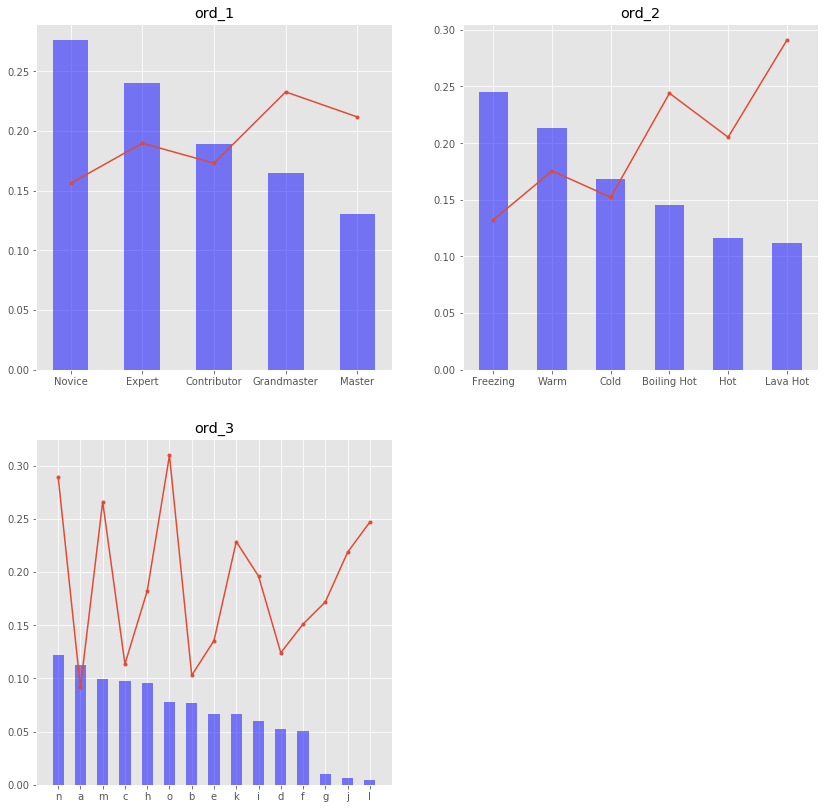

In [295]:
plot_feature(['ord_1', 'ord_2', 'ord_3'])